In [43]:
import plotly.express as px
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt




In [28]:
df = pd.read_csv(r'C:\Users\ahaqu\Downloads\vehicles_us (1).csv')
df.sample(n=10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
26968,16000,2010.0,toyota tacoma,good,6.0,gas,88000.0,automatic,truck,black,1.0,2018-11-27,50
27765,5495,2009.0,chevrolet traverse,good,6.0,gas,164286.0,automatic,wagon,silver,NaN,2018-05-05,46
10625,15700,2010.0,chevrolet camaro lt coupe 2d,good,6.0,gas,68024.0,other,coupe,orange,NaN,2018-07-30,38
47988,17995,NaN,toyota camry,like new,6.0,gas,20800.0,automatic,sedan,red,NaN,2018-07-01,20
50309,10995,2005.0,chevrolet silverado 1500,good,8.0,gas,188764.0,automatic,pickup,NaN,1.0,2018-11-18,56
6947,30486,2015.0,toyota tundra,like new,8.0,gas,71000.0,automatic,truck,NaN,1.0,2019-02-17,67
3817,7500,2006.0,kia sorento,good,6.0,gas,56513.0,automatic,SUV,blue,1.0,2018-05-20,66
121,4800,2006.0,honda accord,like new,4.0,gas,195000.0,automatic,sedan,silver,NaN,2018-12-12,49
27447,12000,2009.0,ford f-150,excellent,8.0,gas,199000.0,automatic,truck,white,1.0,2018-05-12,86
43683,10950,2011.0,ford f-150,excellent,6.0,gas,187079.0,automatic,truck,blue,1.0,2019-03-22,61


In [29]:
df['age']= 2022-df['model_year']

def age_category(x):
    if x<5:return '<5'
    elif x>=5 and x<10: return '5-10'
    elif x>=10 and x<20: return '10-20'
    else: return '>20'
    
df['age_category']= df['age'].apply(age_category)
df['age']

0        11.0
1         NaN
2         9.0
3        19.0
4         5.0
         ... 
51520     9.0
51521    20.0
51522    13.0
51523     9.0
51524     8.0
Name: age, Length: 51525, dtype: float64

In [30]:
df_5 = df[df['age'] < 5]
df_10 = df[(df['age'] >= 5) & (df['age'] < 10)]
df_20 = df[df['age'] >= 10] & (df['age'] <20)
df_over20 = df[df['age'] >20]

df_5['price'].plot(bins= 20, title ='Weight / lbs',ylabel = 'Frequency', kind= 'hist')

df_10['price'].plot (kind= 'hist', bins=20, alpha=0.6)

df_20['price'].plot (kind= 'hist', bins= 20, alpha = 0.3)

df_over20['price'].plot (kind= 'hist', bins = 20, alpha =0.6)

plt.legend(['5', '10', '20', 'over20'])
plt.show()

MemoryError: Unable to allocate 11.4 GiB for an array with shape (51525, 29640) and data type float64

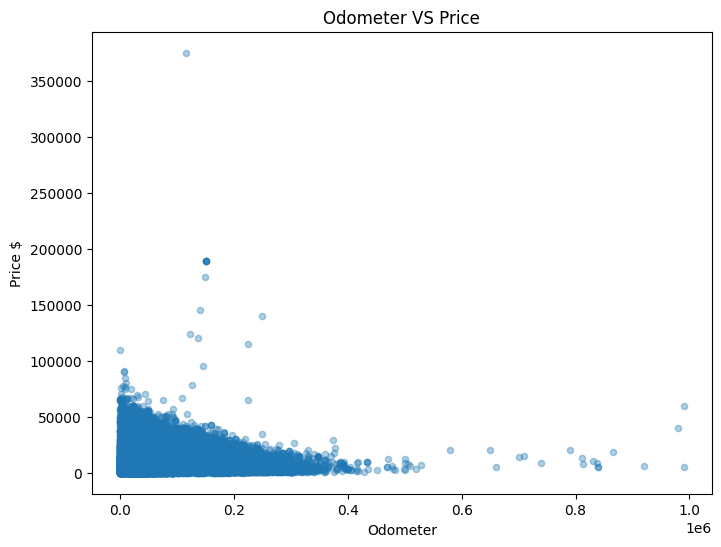

In [44]:
df.plot (x= 'odometer', y= 'price', kind = 'scatter', title = "Odometer VS Price", alpha = 0.36, figsize = [8, 6], xlabel=  'Odometer', ylabel = 'Price $')

plt.show()